In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### data cleaning
- rename race/ethnicity to ethnicity
- remove spaces in column names
- clean null values if present
- explore unique values in catagorical columns
- fix dtypes of the columns if needed
- replace 'none' to 'not completed' in `test preration cource`
- check duplicate rows
- add new column called `division` which gives studet 'first', 'second', 'third' or fail according to total marks.
<br>
total marks above 180 : first division
<br>
total marks between 150 to 179 : Second Division
<br>
total marks between 90 to 149 : Third Divison
<br>
total marks below 90 : Fail
<br>


In [87]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# rename race/ethnicity to ethnicity

In [88]:
df.rename(columns={'race/ethnicity':'ethnicity'},inplace=True)
df

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# remove spaces in column names

In [89]:
col=df.columns
m=[x.replace(" ","_").lower() for x in col]
df.columns=m


In [90]:
df.columns

Index(['gender', 'ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

# clean null values if present

In [91]:
df.isnull()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()

gender                         0
ethnicity                      0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# explore unique values in catagorical columns

In [24]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [25]:
df.ethnicity.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [29]:
df.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [30]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [31]:
df.test_preparation_course.unique()

array(['none', 'completed'], dtype=object)

In [32]:
df.math_score.unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [33]:
df.writing_score.unique()

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  86,  28,  46,  61,  63,  53,  80,  72,  55,  65,  38,
        82,  79,  83,  59,  57,  54,  68,  66,  62,  76,  48,  42,  87,
        49,  10,  34,  71,  37,  56,  41,  22,  81,  45,  36,  89,  47,
        90, 100,  64,  98,  51,  40,  84,  69,  33,  60,  85,  91,  77,
        27,  94,  95,  19,  35,  32,  96,  97,  99,  15,  30,  23],
      dtype=int64)

# replace 'none' to 'not completed' in test preration cource

In [92]:
df.test_preparation_course.replace(to_replace="none",value="not_completed",regex=False,inplace=True)

In [37]:
df

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,not_completed,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,not_completed,90,95,93
3,male,group A,associate's degree,free/reduced,not_completed,47,57,44
4,male,group C,some college,standard,not_completed,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,not_completed,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# check duplicate rows

In [39]:
df.duplicated().sum()

0

# add new column called division

In [100]:
df['total']=df.apply(lambda row: row['math_score']+row['reading_score']+row['writing_score'],axis=1)

In [101]:
df

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,new,division,total
0,female,group B,bachelor's degree,standard,not_completed,72,72,74,218,first_division,218
1,female,group C,some college,standard,completed,69,90,88,247,first_division,247
2,female,group B,master's degree,standard,not_completed,90,95,93,278,first_division,278
3,male,group A,associate's degree,free/reduced,not_completed,47,57,44,148,third_divison,148
4,male,group C,some college,standard,not_completed,76,78,75,229,first_division,229
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,first_division,282
996,male,group C,high school,free/reduced,not_completed,62,55,55,172,second_divison,172
997,female,group C,high school,free/reduced,completed,59,71,65,195,first_division,195
998,female,group D,some college,standard,completed,68,78,77,223,first_division,223


In [102]:
df['division']=df.total.apply(lambda x: 'first_division' if x>180 else('second_divison' if x>150 else 'third_divison' if x>90 else 'fail'))


In [103]:
df.head(10)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,new,division,total
0,female,group B,bachelor's degree,standard,not_completed,72,72,74,218,first_division,218
1,female,group C,some college,standard,completed,69,90,88,247,first_division,247
2,female,group B,master's degree,standard,not_completed,90,95,93,278,first_division,278
3,male,group A,associate's degree,free/reduced,not_completed,47,57,44,148,third_divison,148
4,male,group C,some college,standard,not_completed,76,78,75,229,first_division,229
5,female,group B,associate's degree,standard,not_completed,71,83,78,232,first_division,232
6,female,group B,some college,standard,completed,88,95,92,275,first_division,275
7,male,group B,some college,free/reduced,not_completed,40,43,39,122,third_divison,122
8,male,group D,high school,free/reduced,completed,64,64,67,195,first_division,195
9,female,group B,high school,free/reduced,not_completed,38,60,50,148,third_divison,148


- Average marks of a student in all 3 subjects. 
- Which student got the highest marks in total?
- which student got the lowest marks in total?
- What is the average score of students in each subjects? hint: #make box plot of each subject
- Ratio of Male and Female students. hint: #pie chart
- Ratio of ethnicity of students. hint: # pie chart
- On an average which group performed the best in total marks? hint: group by then pivot table (col = gen, index= eth, val = total)
- Which gender perfomed better overall? hint: #bar plot
- Which gender performed better in each group?  hint: #bar
- How many students have failed and which group have the most? 
- Students got more marks than others whose parents have higer education degree?
- Those students whose completed their course got more grades in compare to those student who didn't?

In [104]:
df.total.mean()

203.312

In [114]:
n=df.sort_values(by='total',ascending=False)
n.head(1)


,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,new,division,total
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,first_division,300


In [112]:
n.tail(1)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,new,division,total
59,female,group C,some high school,free/reduced,not_completed,0,17,10,27,fail,27


# What is the average score of students in each subjects

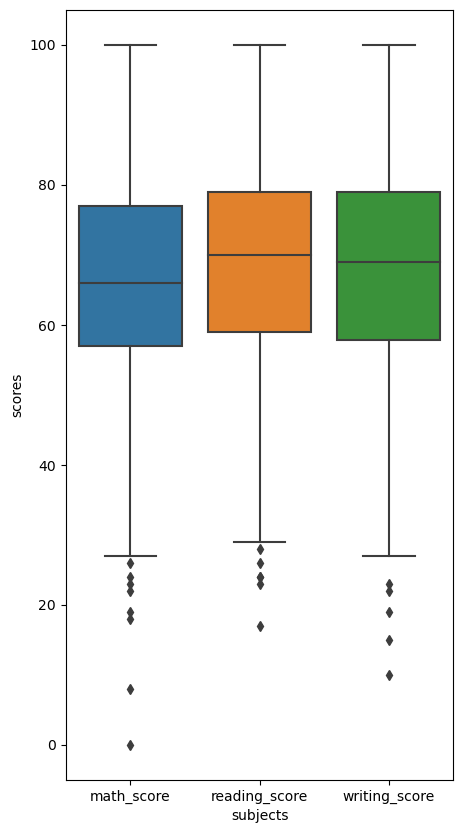

In [189]:
n= pd.melt(frame = df, value_vars=['math_score','reading_score', 'writing_score'], var_name= 'subjects', value_name= 'scores')
n
plt.figure(figsize= (5,10))
sns.boxplot(x = n.subjects, y = n.scores)
plt.show()

# Ratio of Male and Female students 

In [123]:
gen=df.gender.value_counts()
gen

female    518
male      482
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6e50cf100>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51%'),
  Text(0.033911133252536786, -0.5990409293541875, '48%')])

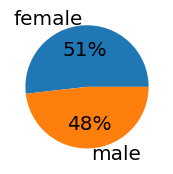

In [133]:
plt.figure(figsize=(8,2))
plt.pie(x= gen,labels=gen.index,autopct='%d%%',textprops={'size': 'x-large'})


# Ratio of ethnicity of students

In [131]:
m=df.ethnicity.value_counts()
m


group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6e5117370>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3230859994074431, 0.5055842531041623, '31%'),
  Text(-0.5706339132489631, 0.18541018593964795, '26%'),
  Text(-0.2690299328676182, -0.5363048528787007, '18%'),
  Text(0.32467274541824787, -0.5045667531482604, '14%'),
  Text(0.5766992522671516, -0.1655837323969605, '8%')])

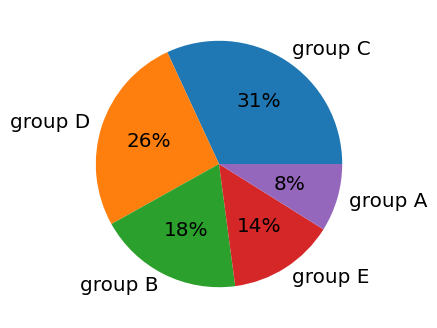

In [134]:
plt.figure(figsize=(4,4))
plt.pie(x= m,labels=m.index,autopct='%d%%',textprops={'size': 'x-large'})


# On an average which group performed the best in total marks?

In [147]:
n=df.pivot_table(columns='gender',index='ethnicity',values='total',aggfunc='mean')
n

gender,female,male
ethnicity,,
group A,195.388889,184.622642
group B,202.528846,189.000000
group C,205.755556,195.748201
group D,214.317829,200.962406
group E,222.188406,214.436620


# Which gender perfomed better overall?

<AxesSubplot:xlabel='gender', ylabel='total'>

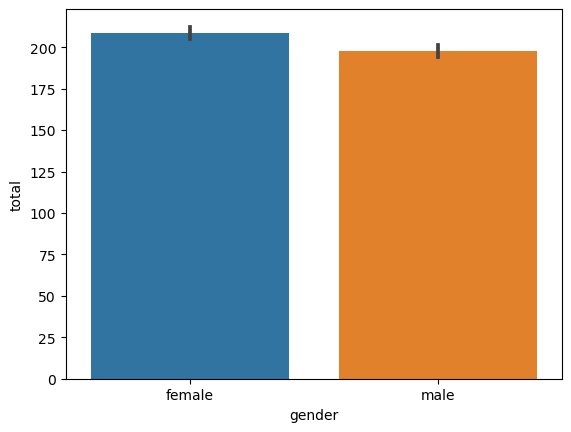

In [148]:
sns.barplot(x='gender',y='total',data=df)

# Which gender performed better in each group


<AxesSubplot:xlabel='ethnicity', ylabel='total'>

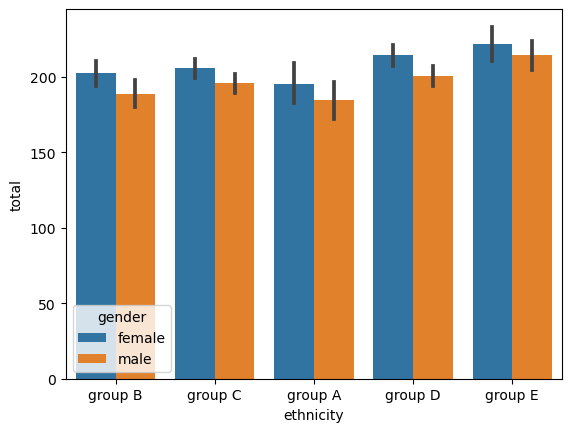

In [151]:
sns.barplot(x='ethnicity',y='total',hue='gender',data=df)

In [152]:
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,new,division,total
0,female,group B,bachelor's degree,standard,not_completed,72,72,74,218,first_division,218
1,female,group C,some college,standard,completed,69,90,88,247,first_division,247
2,female,group B,master's degree,standard,not_completed,90,95,93,278,first_division,278
3,male,group A,associate's degree,free/reduced,not_completed,47,57,44,148,third_divison,148
4,male,group C,some college,standard,not_completed,76,78,75,229,first_division,229


# How many students have failed and which group have the most

In [174]:
n=df[df['division']=='fail']
n.ethnicity.value_counts()

group B    5
group C    3
group E    1
group A    1
Name: ethnicity, dtype: int64

# Students got more marks than others whose parents have higer education degree

<AxesSubplot:xlabel='parental_level_of_education', ylabel='total'>

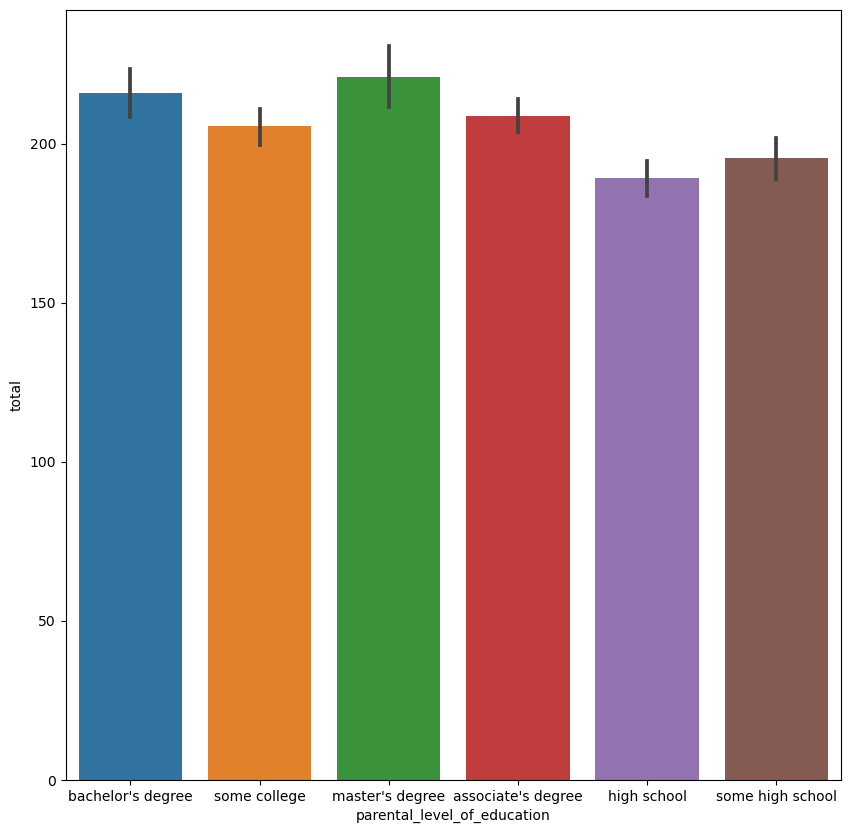

In [180]:
plt.figure(figsize=(10,10))
sns.barplot(x='parental_level_of_education',y='total',data=df)

# Those students whose completed their course got more grades in compare to those student who didn't

([<matplotlib.patches.Wedge at 0x1f6e68ad6a0>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'not_completed'),
  Text(0.4746018041084478, -0.9923472817199666, 'completed')],
 [Text(-0.2588736606535569, 0.5412803597211218, '64%'),
  Text(0.2588737113318806, -0.5412803354836181, '35%')])

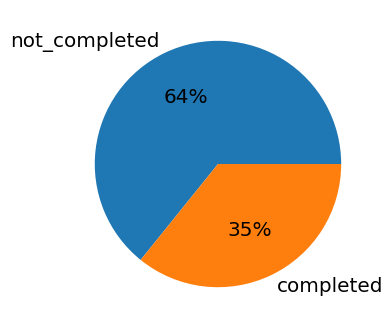

In [184]:
p=df.test_preparation_course.value_counts()
plt.figure(figsize=(4,4))
plt.pie(x= p,labels=p.index,autopct='%d%%',textprops={'size': 'x-large'})
